## **Data Processing**

### Mount your drive

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

### Load your data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_path = 'data.csv'
df = pd.read_csv(file_path)
df

<ipython-input-3-f3279ae73ab2>:2: DtypeWarning: Columns (33,82,91,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Assay ID - IEDB IRI,Reference - IEDB IRI,Reference - Type,Reference - PMID,Reference - Submission ID,Reference - Authors,Reference - Journal,Reference - Date,Reference - Title,Epitope - IEDB IRI,...,Assay Antigen - Ending Position,Assay Antigen - IRI,Assay Antigen - Source Molecule,Assay Antigen - Source Molecule IRI,Assay Antigen - Molecule Parent,Assay Antigen - Molecule Parent IRI,Assay Antigen - Source Organism,Assay Antigen - Source Organism IRI,Assay Antigen - Species,Assay Antigen - Species IRI
0,http://www.iedb.org/assay/6181,http://www.iedb.org/reference/630,Literature,15340914,NaN,Jonathan P Schuermann; Michael T Henzl; Susan ...,Proteins,2004,Structure of an anti-DNA fab complexed with a ...,http://www.iedb.org/epitope/190604,...,NaN,http://purl.obolibrary.org/obo/CHEBI_42334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.iedb.org/assay/24548,http://www.iedb.org/reference/630,Literature,15340914,NaN,Jonathan P Schuermann; Michael T Henzl; Susan ...,Proteins,2004,Structure of an anti-DNA fab complexed with a ...,http://www.iedb.org/epitope/190604,...,NaN,http://purl.obolibrary.org/obo/CHEBI_42334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.iedb.org/assay/1243011,http://www.iedb.org/reference/1000928,Literature,1689763,NaN,H H Guldner; H J Netter; C Szostecki; E Jaeger...,J Exp Med,1990,Human anti-p68 autoantibodies recognize a comm...,http://www.iedb.org/epitope/49763,...,76.0,NaN,U1 small nuclear ribonucleoprotein 70 kDa,https://www.uniprot.org/uniprot/P08621.2,U1 small nuclear ribonucleoprotein 70 kDa,http://www.uniprot.org/uniprot/P08621,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606
3,http://www.iedb.org/assay/1243038,http://www.iedb.org/reference/1000928,Literature,1689763,NaN,H H Guldner; H J Netter; C Szostecki; E Jaeger...,J Exp Med,1990,Human anti-p68 autoantibodies recognize a comm...,http://www.iedb.org/epitope/14013,...,72.0,NaN,U1 small nuclear ribonucleoprotein 70 kDa,https://www.uniprot.org/uniprot/P08621.2,U1 small nuclear ribonucleoprotein 70 kDa,http://www.uniprot.org/uniprot/P08621,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606
4,http://www.iedb.org/assay/1243120,http://www.iedb.org/reference/1000928,Literature,1689763,NaN,H H Guldner; H J Netter; C Szostecki; E Jaeger...,J Exp Med,1990,Human anti-p68 autoantibodies recognize a comm...,http://www.iedb.org/epitope/14013,...,NaN,http://www.ncbi.nlm.nih.gov/protein/AAA67100.1,NaN,NaN,NaN,NaN,Influenza B virus (B/Singapore/222/79),http://purl.obolibrary.org/obo/NCBITaxon_107417,Influenza B virus,http://purl.obolibrary.org/obo/NCBITaxon_11520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,http://www.iedb.org/assay/22507991,http://www.iedb.org/reference/1042472,Literature,37247788,NaN,Xin Li; Hong-Xia Wang; Xiaofeng Yin; Xueheng L...,Immunol Lett,2023,Screening epitope peptides based on a phage-di...,http://www.iedb.org/epitope/2223304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6550,http://www.iedb.org/assay/22507992,http://www.iedb.org/reference/1042472,Literature,37247788,NaN,Xin Li; Hong-Xia Wang; Xiaofeng Yin; Xueheng L...,Immunol Lett,2023,Screening epitope peptides based on a phage-di...,http://www.iedb.org/epitope/2223178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6551,http://www.iedb.org/assay/22507993,http://www.iedb.org/reference/1042472,Literature,37247788,NaN,Xin Li; Hong-Xia Wang; Xiaofeng Yin; Xueheng L...,Immunol Lett,2023,Screening epitope peptides based on a phage-di...,http://www.iedb.org/epitope/2223229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6552,http://www.iedb.org/assay/22507994,http://www.iedb.org/reference/1042472,Literature,37247788,NaN,Xin Li; Hong-Xia Wang; Xiaofeng Yin; Xueheng L...,Immunol Lett,2023,Screening epitope peptides based on a phage-di...,http://www.iedb.org/epitope/2223292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
target_column = 'Assay - Qualitative Measure'
value_counts = df[target_column].value_counts()

print(value_counts)

Assay - Qualitative Measure
Negative                 4210
Positive                 2105
Positive-Low              146
Positive-High              74
Positive-Intermediate      19
Name: count, dtype: int64


In [5]:
df['Assay - Qualitative Measure'] = df['Assay - Qualitative Measure'].replace({
    'Positive-Low': 1,
    'Positive-High': 1,
    'Positive-Intermediate': 1,
    'Positive': 1,
    'Negative': 0
})

In [6]:
value_counts = df[target_column].value_counts()
print(value_counts)

Assay - Qualitative Measure
0    4210
1    2344
Name: count, dtype: int64


In [7]:
df.shape

(6554, 131)

### Data Cleaning

In [8]:
df = df.dropna(axis=1, how='all')    #removing completely empty columns
df.shape

(6554, 128)

In [9]:
def check_http(entry):
    return any('http' in str(x) or 'https' in str(x) for x in entry)

columns_to_drop = df.apply(check_http)

# Drop columns that have any 'http' or 'https'
df = df.drop(columns=columns_to_drop[columns_to_drop].index)
df.shape

(6554, 95)

In [10]:
columns_to_drop = [col for col in df.columns if 'reference' in col.lower()]
columns_to_drop2 = [col for col in df.columns if 'pdb' in col.lower()]
# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df = df.drop(columns=columns_to_drop2)
df.shape

(6554, 84)

In [11]:
columns_to_drop = [col for col in df.columns if 'related object' in col.lower()]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df.shape

(6554, 74)

In [12]:
columns_to_drop = [col for col in df.columns if '2nd immunogen' in col.lower()]
columns_to_drop2 = [col for col in df.columns if '2nd in vivo process' in col.lower()]
# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df = df.drop(columns=columns_to_drop2)
df.shape

(6554, 59)

In [13]:
# use only SLE outcomes
mask = df['1st in vivo Process - Disease'] == 'systemic lupus erythematosus'
df = df[mask]
df.shape

(6491, 59)

In [14]:
# find missing counts
df.isna().sum()

Epitope - Object Type                           0
Epitope - Name                                  0
Epitope - Modified residues                  6349
Epitope - Modifications                      6349
Epitope - Starting Position                  1151
Epitope - Ending Position                    1151
Epitope - Synonyms                           5727
Epitope - Source Molecule                    1073
Epitope - Molecule Parent                    1185
Epitope - Source Organism                     982
Epitope - Species                             982
Epitope - Comments                           4791
Host - Name                                     0
Host - Geolocation                           5255
Host - Sex                                   5971
Host - Age                                   5250
1st in vivo Process - Process Type              0
1st in vivo Process - Disease                   0
1st in vivo Process - Disease Stage             0
1st immunogen - Epitope Relation             6473


In [15]:
# dropping specific columns
df = df.drop(['Epitope - Modified residues', 'Epitope - Synonyms', 'Epitope - Molecule Parent', 'Epitope - Species', 'Epitope - Comments',
              'Host - Geolocation', '1st immunogen - Epitope Relation', '1st immunogen - Object Type', 'Epitope - Modifications',
              '1st immunogen - Name', '1st immunogen - Starting Position', '1st immunogen - Ending Position', 'Host - Sex',
              '1st immunogen - Source Molecule', '1st immunogen - Molecule Parent', '1st immunogen - Source Organism',
              '1st immunogen - Species', '1st immunogen - Adjuvants', '1st immunogen - Route', '1st immunogen - Dose Schedule',
              'Adoptive Transfer - Comments', 'Immunization - Comments', 'Assay - Measurement Inequality', 'Assay - Quantitative measurement',
              'Assay - Comments', 'Assay - Number of Subjects Tested', 'Assay - Number of Subjects Positive', 'Assay - Units',
              'Assay Antibody - Antibody Name', 'Assay Antibody - Light chain isotype', 'Assay Antigen - Name', 'Assay Antigen - Starting Position',
              'Assay Antigen - Ending Position', 'Assay Antigen - Source Molecule', 'Assay Antigen - Molecule Parent'], axis=1)

In [16]:
# use only Linear Peptides
mask = df['Epitope - Object Type'] == 'Linear peptide'
df = df[mask]
df.shape

(5720, 24)

In [17]:
# Regular expression for matching only the 20 amino acids one-letter codes and to ensure only sequences with 25 amino acids
amino_acid_regex = '^[ACDEFGHIKLMNPQRSTVWY]+$'
mask = df['Epitope - Name'].str.match(amino_acid_regex) & (df['Epitope - Name'].str.len() <= 25)
df = df[mask]
df.shape

(5503, 24)

In [18]:
unique_age = df['Host - Age'].unique()

print("Unique values in 'Host - Age':", unique_age)

Unique values in 'Host - Age': [nan '27-74 years' '15-83 years' '8 weeks' '15 to 71 years' '36-38 weeks'
 '21, 27 and 36 weeks' '17 months' '6 to 8 weeks' '19-56 years'
 '18-60 years' '13-68' '5 months' '6-8 weeks' '18 to 30 years'
 '6-7 months' '14-22 weeks' '23.6-53.8' '49-66 years' '14 to 45'
 '8-9 weeks' 'Less than 20 years' '6-9 months' '12 weeks'
 'average= 34.6 years' '18-46 years' '> 20 weeks' '19 years'
 'Mean age = 34.8 years' '10-67 years' '13 to 29 years' '6 months'
 '4 months' '2-8 months' '36.47 +/- 12.46 years' '19 to 66 years'
 '19 to 71 years' '27 to 60 years' '33 to 84 years' '19 to 64 years'
 '36.2 +/- 8.9 years' '2 to 67 years' '8 months' 'mean age = 57 years'
 'neonate' '55.7 +/- 5.7' '28-42 years' '8 to 10 months' '18 months'
 '38-54 weeks' '22 to 76 years' '14.3 +/- 5.7 years' 'average 34.5 years'
 '37 to 79 years' '30 to 51 years' '30 to 45 years' '21.1 to 39.9 years'
 '14-71 years' '16-84 years' '3-5 weeks' '32-54 years' 'median 48 years']


In [19]:
#handling ages

def convert_to_years(age):
    age = str(age).lower().strip().replace('years', '').replace('year', '').replace('and', ',')
    if 'weeks' in age:
        parts = age.replace('weeks', '').split('-')
        year_values = [float(part.strip()) / 52 for part in parts if part.strip().isdigit()]
        return np.mean(year_values)
    elif 'months' in age:
        parts = age.replace('months', '').split('-')
        year_values = [float(part.strip()) / 12 for part in parts if part.strip().isdigit()]
        return np.mean(year_values)
    elif 'to' in age:
        range_parts = age.replace(' to ', '-').split('-')
        return np.mean([float(part.strip()) for part in range_parts if part.strip().isdigit()])
    elif '-' in age:
        range_parts = age.split('-')
        return np.mean([float(part.strip()) for part in range_parts if part.strip().isdigit()])
    elif any(x in age for x in ['<', '>', '+/-', 'average', 'mean', 'median']):
        nums = [float(x) for x in age.replace('+/-', '').split() if x.replace('.', '', 1).isdigit()]
        return np.mean(nums)
    elif 'neonate' in age:
        return 0
    try:
        return float(age)
    except ValueError:
        return None

def categorize_age(age):
    if age is None:
        return "Unknown"
    if age < 1:
        return 'Neonates (0-1 years)'
    elif age <= 12:
        return 'Children (1-12 years)'
    elif age <= 19:
        return 'Adolescents (13-19 years)'
    elif age <= 64:
        return 'Adults (20-64 years)'
    else:
        return 'Seniors (65+ years)'


df['Host - Age'] = df['Host - Age'].apply(lambda x: categorize_age(convert_to_years(x)))
df['Host - Age'].unique()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


array(['Seniors (65+ years)', 'Adults (20-64 years)',
       'Neonates (0-1 years)', 'Children (1-12 years)', 'Unknown',
       'Adolescents (13-19 years)'], dtype=object)

In [20]:
# For 'Adoptive Transfer - Flag' make N as 0 and Y as 1
mapping_dict = {'N': 0, 'Y': 1}
df['Adoptive Transfer - Flag'] = df['Adoptive Transfer - Flag'].map(mapping_dict)

In [21]:
# Dealing with Assay types
df['Assay - Method'].value_counts()

Assay - Method
ELISA                              3383
microarray                         1173
western blot                        558
phage display                       185
inhibition by antigen               101
surface plasmon resonance (SPR)      63
in vivo assay                        20
chromatography                        5
biological activity                   4
immunoprecipitation                   3
immuno staining                       3
radio immuno assay (RIA)              2
mass spectrometry                     2
flow cytometry                        1
Name: count, dtype: int64

In [22]:
top_methods = df['Assay - Method'].value_counts().nlargest(4).index
df['Assay - Method'] = df['Assay - Method'].apply(lambda x: x if x in top_methods else 'other')
df['Assay - Method'].value_counts()

Assay - Method
ELISA            3383
microarray       1173
western blot      558
other             204
phage display     185
Name: count, dtype: int64

In [23]:
df['Host - Name'].unique()

array(['Homo sapiens (human)', 'Mus musculus SNF1',
       'Oryctolagus cuniculus New Zealand White',
       'Homo sapiens Caucasian', 'Mus musculus NZB X NZW',
       'Mus musculus MRL', 'Mus musculus MLR/lpr',
       'Mus musculus SJL X SWR', 'Homo sapiens Black',
       'Mus musculus MRL/MpJ', 'Mus musculus viable motheaten',
       'Mus musculus BALB/c', 'Mus musculus C57BL/6 X DBA/2'],
      dtype=object)

In [24]:
df['Host - Name'] = df['Host - Name'].apply(lambda x: ' '.join(x.split()[:2]))
df['Host - Name'].unique()

array(['Homo sapiens', 'Mus musculus', 'Oryctolagus cuniculus'],
      dtype=object)

In [25]:
value_counts = df[target_column].value_counts()
print(value_counts)

Assay - Qualitative Measure
0    4095
1    1408
Name: count, dtype: int64


In [26]:
print(df.columns)

Index(['Epitope - Object Type', 'Epitope - Name',
       'Epitope - Starting Position', 'Epitope - Ending Position',
       'Epitope - Source Molecule', 'Epitope - Source Organism', 'Host - Name',
       'Host - Age', '1st in vivo Process - Process Type',
       '1st in vivo Process - Disease', '1st in vivo Process - Disease Stage',
       'Adoptive Transfer - Flag', 'Assay - Method',
       'Assay - Response measured', 'Assay - Qualitative Measure',
       'Assay - Response Frequency (%)',
       'Assay Antibody - Antibody Source Material',
       'Assay Antibody - Immunoglobulin Domain',
       'Assay Antibody - Purification Status',
       'Assay Antibody - Heavy chain isotype',
       'Assay Antigen - Epitope Relation', 'Assay Antigen - Object Type',
       'Assay Antigen - Source Organism', 'Assay Antigen - Species'],
      dtype='object')


In [27]:
all_columns = list(df.columns)
desired_order = ['Epitope - Name', 'Assay - Qualitative Measure'] + [col for col in all_columns if col not in ['Epitope - Name', 'Assay - Qualitative Measure']]
df = df[desired_order]
df.head()

,Epitope - Name,Assay - Qualitative Measure,Epitope - Object Type,Epitope - Starting Position,Epitope - Ending Position,Epitope - Source Molecule,Epitope - Source Organism,Host - Name,Host - Age,1st in vivo Process - Process Type,...,Assay - Response measured,Assay - Response Frequency (%),Assay Antibody - Antibody Source Material,Assay Antibody - Immunoglobulin Domain,Assay Antibody - Purification Status,Assay Antibody - Heavy chain isotype,Assay Antigen - Epitope Relation,Assay Antigen - Object Type,Assay Antigen - Source Organism,Assay Antigen - Species
2,PTRAETREERMERKRREKIE,1,Linear peptide,57.0,76.0,U1 small nuclear ribonucleoprotein 70 kDa,Homo sapiens,Homo sapiens,Seniors (65+ years),Occurrence of autoimmune disease,...,qualitative binding,NaN,Serum,NaN,Polyclonal,NaN,Epitope,Linear peptide,Homo sapiens,Homo sapiens
3,ERKRR,1,Linear peptide,68.0,72.0,U1 small nuclear ribonucleoprotein 70 kDa,Homo sapiens,Homo sapiens,Seniors (65+ years),Occurrence of autoimmune disease,...,qualitative binding,NaN,Serum,NaN,Polyclonal,NaN,Epitope,Linear peptide,Homo sapiens,Homo sapiens
4,ERKRR,1,Linear peptide,68.0,72.0,U1 small nuclear ribonucleoprotein 70 kDa,Homo sapiens,Homo sapiens,Seniors (65+ years),Occurrence of autoimmune disease,...,qualitative binding,NaN,Serum,NaN,Polyclonal,NaN,Other,Protein,Influenza B virus (B/Singapore/222/79),Influenza B virus
6,AEEEEDDDMGFGLFD,1,Linear peptide,93.0,107.0,ribosomal protein P-JL5,Trypanosoma cruzi,Homo sapiens,Seniors (65+ years),Occurrence of autoimmune disease,...,qualitative binding,100.0,Serum,Entire Antibody,Polyclonal,IgG,Epitope,Linear peptide,Trypanosoma cruzi,Trypanosoma cruzi
7,ASAPTAAAAASGGAAAPAA,0,Linear peptide,73.0,91.0,ribosomal protein P-JL5,Trypanosoma cruzi,Homo sapiens,Seniors (65+ years),Occurrence of autoimmune disease,...,qualitative binding,0.0,Serum,Entire Antibody,Polyclonal,IgG,Epitope,Linear peptide,Trypanosoma cruzi,Trypanosoma cruzi


In [28]:
# Export as csv
df.to_csv('clean_data.csv', index=False)

### EDA and Visualizations

In [29]:
statistics = df[['Epitope - Starting Position', 'Epitope - Ending Position', 'Assay - Response Frequency (%)']].describe()
print(statistics)

       Epitope - Starting Position  Epitope - Ending Position  \
count                  5151.000000                5151.000000   
mean                    216.347894                 226.585517   
std                     252.487867                 253.044548   
min                       1.000000                   6.000000   
25%                      68.000000                  77.000000   
50%                     145.000000                 155.000000   
75%                     267.000000                 277.500000   
max                    3030.000000                3051.000000   

       Assay - Response Frequency (%)  
count                     4445.000000  
mean                         7.791901  
std                         23.089211  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          0.000000  
max                        100.000000  


In [30]:
disease_stage_epitope_counts = df.groupby('1st in vivo Process - Disease Stage')['Epitope - Name'].nunique()
disease_stage_assay_counts = df.groupby('1st in vivo Process - Disease Stage')['Assay - Method'].nunique()

print(disease_stage_epitope_counts)
print(disease_stage_assay_counts)

1st in vivo Process - Disease Stage
Acute/Recent onset             207
Acute/Recent onset,Chronic       2
Chronic                       4239
Unknown                         34
Name: Epitope - Name, dtype: int64
1st in vivo Process - Disease Stage
Acute/Recent onset            5
Acute/Recent onset,Chronic    1
Chronic                       5
Unknown                       3
Name: Assay - Method, dtype: int64


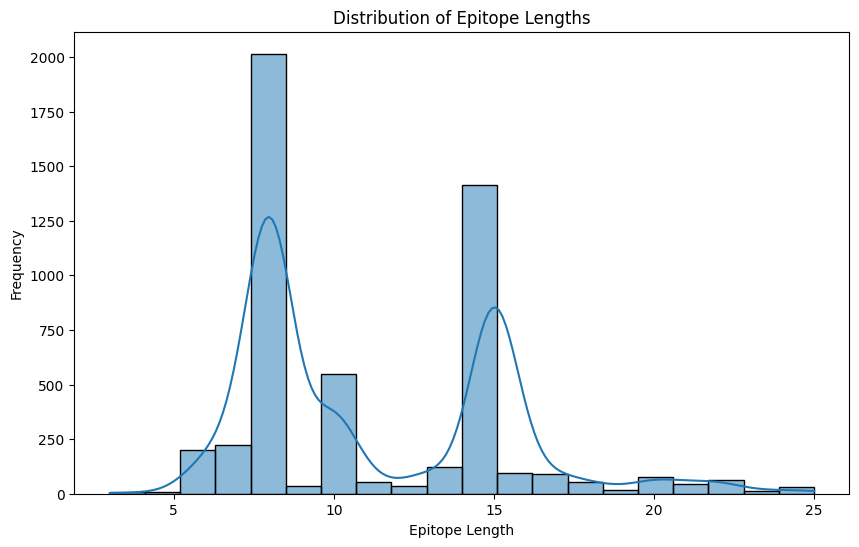

In [31]:
df['Epitope Length'] = df['Epitope - Ending Position'] - df['Epitope - Starting Position'] + 1

plt.figure(figsize=(10, 6))
sns.histplot(df['Epitope Length'], bins=20, kde=True)
plt.title('Distribution of Epitope Lengths')
plt.xlabel('Epitope Length')
plt.ylabel('Frequency')
plt.show()

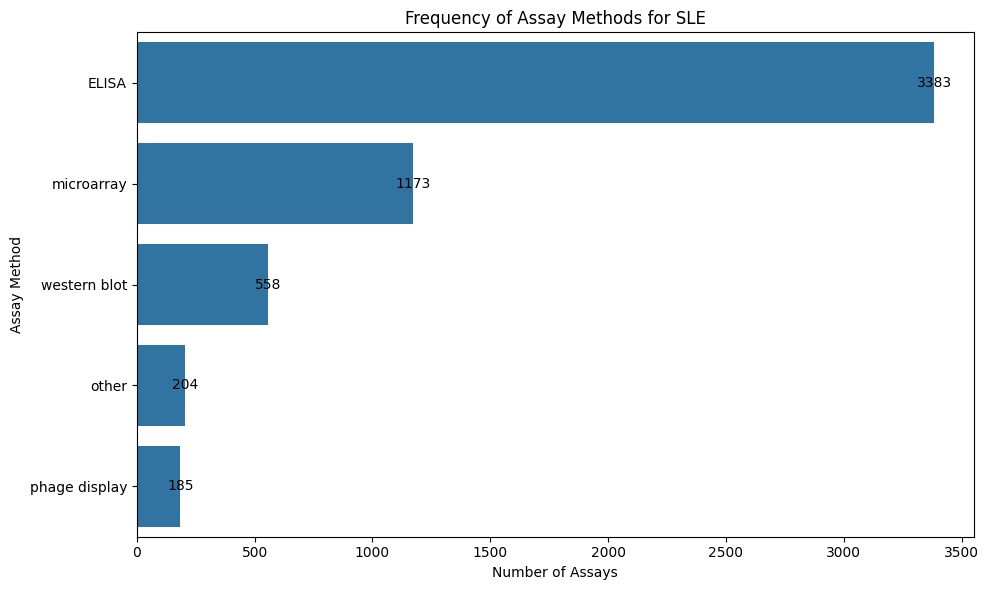

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Assay - Method', data=df, order=df['Assay - Method'].value_counts().index)
plt.title('Frequency of Assay Methods for SLE')
plt.xlabel('Number of Assays')
plt.ylabel('Assay Method')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2., '{:1.0f}'.format(width), ha='center', va='center')

plt.tight_layout()
plt.show()

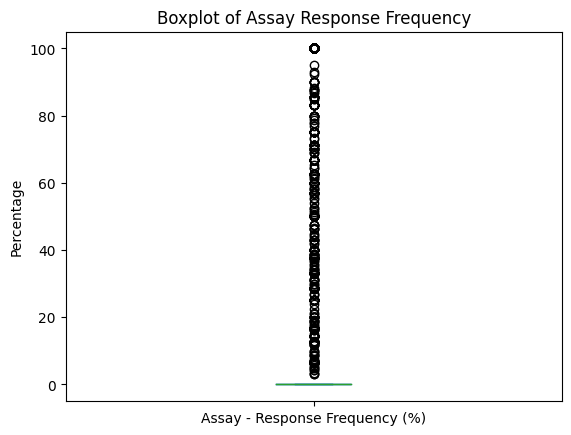

In [33]:
df['Assay - Response Frequency (%)'].plot(kind='box')
plt.title('Boxplot of Assay Response Frequency')
plt.ylabel('Percentage')
plt.show()

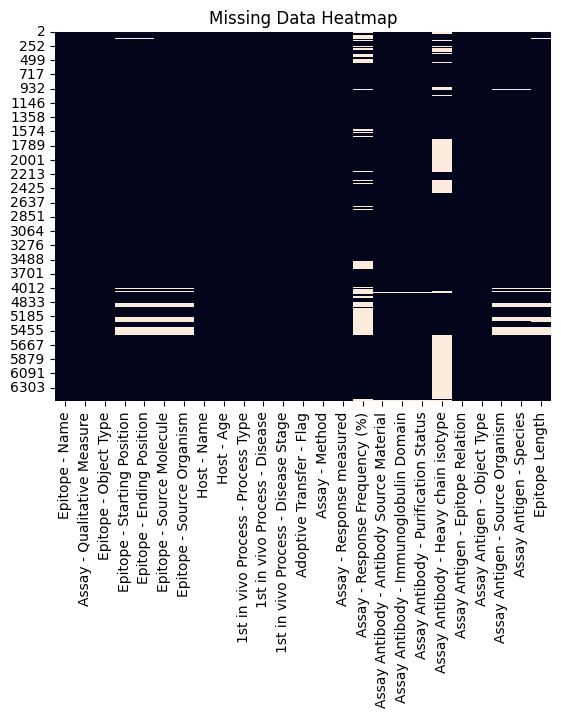

In [34]:
# Heatmap of missing values
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

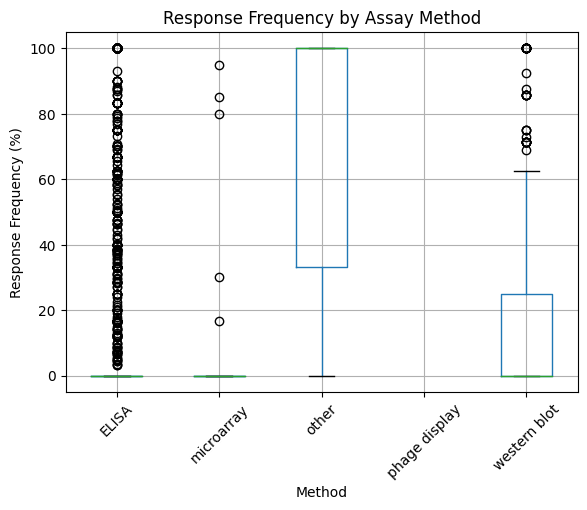

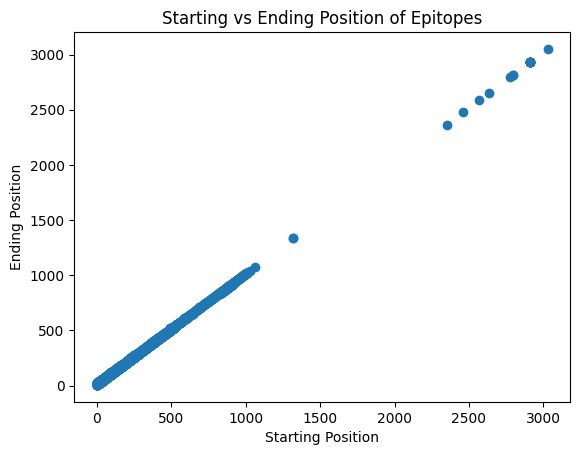

In [35]:
# Grouped boxplot for 'Assay - Response Frequency (%)' by 'Assay - Method'
df.boxplot(column='Assay - Response Frequency (%)', by='Assay - Method', rot=45)
plt.title('Response Frequency by Assay Method')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Method')
plt.ylabel('Response Frequency (%)')
plt.show()

# Scatter plot for Starting vs Ending Position of Epitopes
plt.scatter(df['Epitope - Starting Position'], df['Epitope - Ending Position'])
plt.title('Starting vs Ending Position of Epitopes')
plt.xlabel('Starting Position')
plt.ylabel('Ending Position')
plt.show()

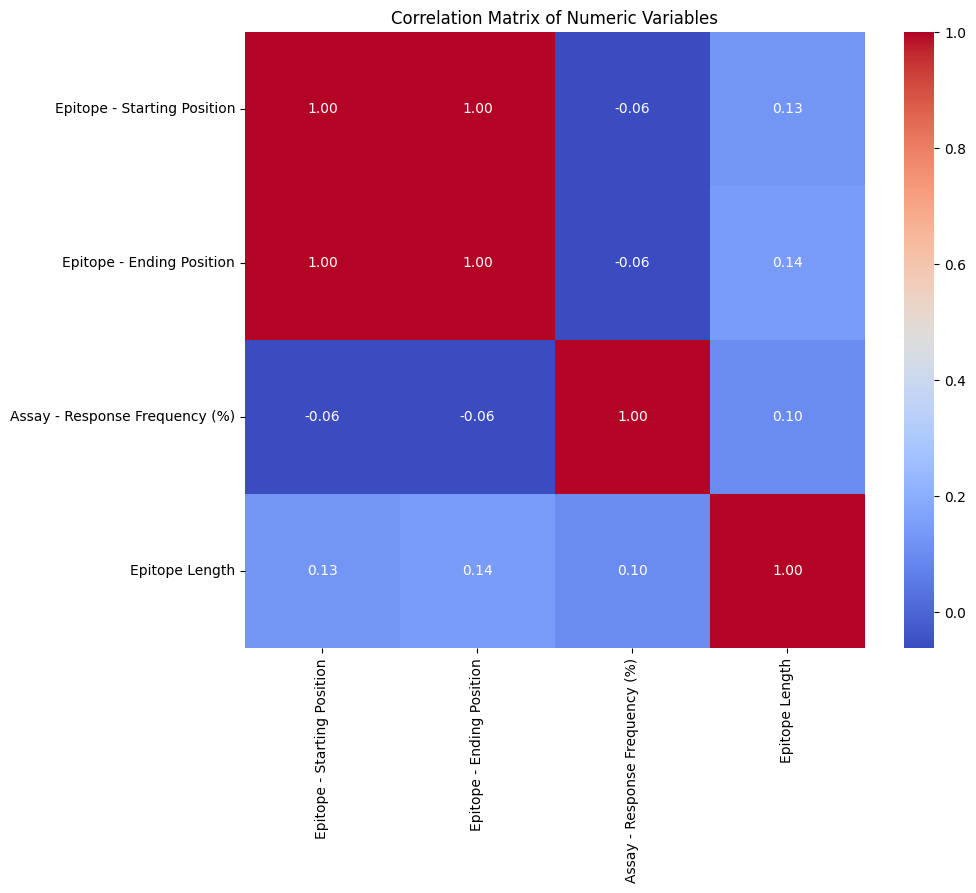

In [36]:
numeric_cols = ['Epitope - Starting Position', 'Epitope - Ending Position', 'Assay - Response Frequency (%)', 'Epitope Length']
correlation_matrix = df[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

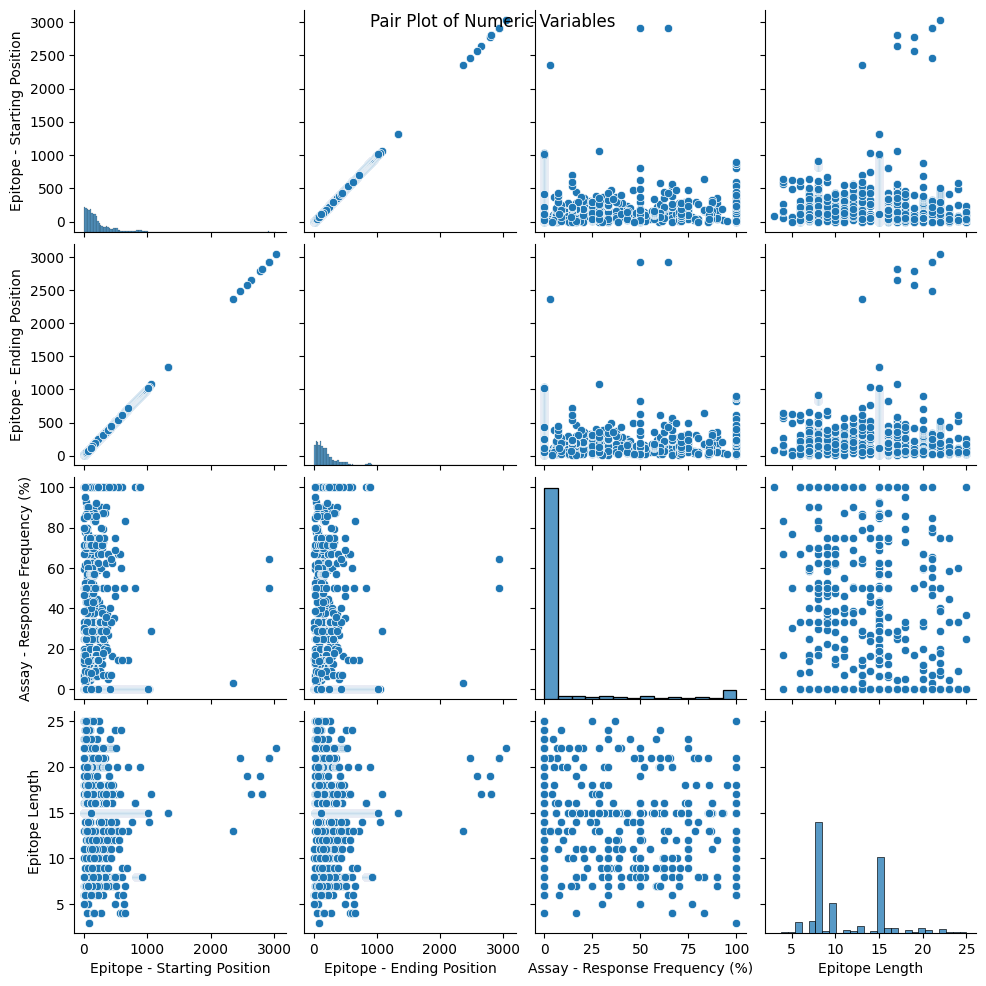

In [37]:
sns.pairplot(df[numeric_cols])
plt.suptitle('Pair Plot of Numeric Variables')
plt.show()

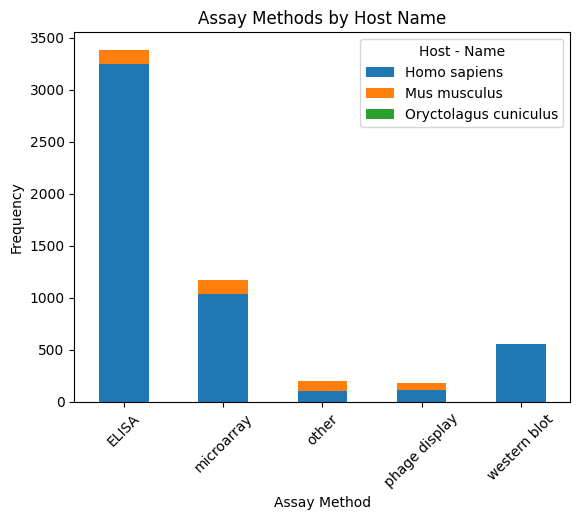

In [38]:
# Clustered bar chart for 'Assay - Method' by 'Host - Name'
pd.crosstab(df['Assay - Method'], df['Host - Name']).plot(kind='bar', stacked=True)
plt.title('Assay Methods by Host Name')
plt.xlabel('Assay Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [39]:
from collections import Counter
import re

# Assuming 'Epitope - Source Molecule' contains descriptive text
words = df['Epitope - Source Molecule'].dropna().apply(lambda x: re.findall(r'\w+', x.lower()))
all_words = Counter(word for sublist in words for word in sublist)

# Display the most common words
print(all_words.most_common(10))

[('ribonucleoprotein', 2414), ('nuclear', 1399), ('protein', 1356), ('small', 1342), ('ro', 1139), ('subunit', 998), ('p', 985), ('u1', 730), ('ribonucleases', 506), ('mrp', 506)]
